In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

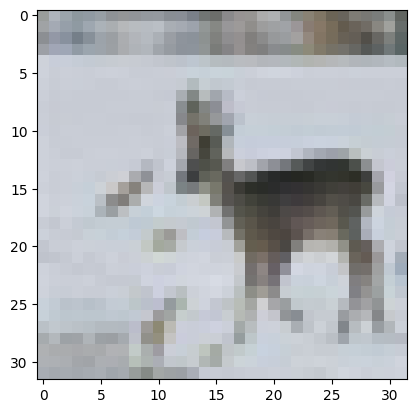

In [3]:
plt.imshow(X_train[20])

In [4]:
len(X_train), len(X_test)

(50000, 10000)

In [4]:
X_test, X_valid, y_test, y_valid = tts(X_test, y_test, test_size=0.2)

In [6]:
len(X_test), len(X_valid)

(8000, 2000)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

In [10]:
base_vgg16 = keras.applications.VGG16(weights = "imagenet", include_top=False, input_shape=(32,32,3), pooling = 'avg')

Metal device set to: Apple M1


In [11]:
inputs = keras.Input(shape = (32,32,3))
x= base_vgg16(inputs)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model = keras.models.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 Dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 Dense_2 (Dense)             (None, 2046)              2097150   
                                                                 
 Dense_3 (Dense)             (None, 512)               1048064   
                                                                 
 Dense_4 (Dense)             (None, 256)               131328    
                                                                 
 Output (Dense)              (None, 10)                2570  

In [12]:
model.compile(keras.optimizers.legacy.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(), keras.metrics.Precision(), keras.metrics.Recall()],)

In [7]:
X_dataset_train = tf.data.Dataset.from_tensor_slices(X_train)
y_dataset_train = tf.data.Dataset.from_tensor_slices(y_train)

dataset_train = tf.data.Dataset.zip((X_dataset_train, y_dataset_train))

Metal device set to: Apple M1


In [8]:
X_dataset_valid = tf.data.Dataset.from_tensor_slices(X_test)
y_dataset_valid = tf.data.Dataset.from_tensor_slices(y_test)

dataset_valid = tf.data.Dataset.zip((X_dataset_valid, y_dataset_valid))

In [9]:
dataset_train = dataset_train.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)
dataset_valid = dataset_valid.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [11]:
X_dataset_test = tf.data.Dataset.from_tensor_slices(X_valid)
y_dataset_test = tf.data.Dataset.from_tensor_slices(y_valid)

dataset_test = tf.data.Dataset.zip((X_dataset_test, y_dataset_test))
dataset_test = dataset_test.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
history = model.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=50, callbacks=tf.keras.callbacks.TensorBoard())

Epoch 1/50
196/196 [==============================] - 79s 397ms/step - loss: 1.8299 - f1_score: 0.2454 - precision: 0.5809 - recall: 0.0411 - val_loss: 1.4663 - val_f1_score: 0.3705 - val_precision: 0.5995 - val_recall: 0.2275
Epoch 2/50
196/196 [==============================] - 78s 399ms/step - loss: 1.1278 - f1_score: 0.5765 - precision: 0.7290 - recall: 0.4171 - val_loss: 0.9205 - val_f1_score: 0.6825 - val_precision: 0.7890 - val_recall: 0.5894
Epoch 3/50
196/196 [==============================] - 80s 411ms/step - loss: 0.7984 - f1_score: 0.7287 - precision: 0.8230 - recall: 0.6449 - val_loss: 0.7985 - val_f1_score: 0.7331 - val_precision: 0.8214 - val_recall: 0.6748
Epoch 4/50
196/196 [==============================] - 82s 416ms/step - loss: 0.5924 - f1_score: 0.8046 - precision: 0.8703 - recall: 0.7519 - val_loss: 0.6508 - val_f1_score: 0.7976 - val_precision: 0.8557 - val_recall: 0.7533
Epoch 5/50
196/196 [==============================] - 82s 419ms/step - loss: 0.4552 - f1_sco

Epoch 37/50
196/196 [==============================] - 90s 460ms/step - loss: 0.0343 - f1_score: 0.9903 - precision: 0.9912 - recall: 0.9895 - val_loss: 0.9055 - val_f1_score: 0.8347 - val_precision: 0.8440 - val_recall: 0.8280
Epoch 38/50
196/196 [==============================] - 89s 452ms/step - loss: 0.0430 - f1_score: 0.9887 - precision: 0.9899 - recall: 0.9874 - val_loss: 0.9057 - val_f1_score: 0.8331 - val_precision: 0.8487 - val_recall: 0.8260
Epoch 39/50
196/196 [==============================] - 90s 457ms/step - loss: 0.0423 - f1_score: 0.9884 - precision: 0.9896 - recall: 0.9873 - val_loss: 0.9242 - val_f1_score: 0.8381 - val_precision: 0.8457 - val_recall: 0.8321
Epoch 40/50
196/196 [==============================] - 88s 450ms/step - loss: 0.0289 - f1_score: 0.9919 - precision: 0.9927 - recall: 0.9912 - val_loss: 0.9765 - val_f1_score: 0.8377 - val_precision: 0.8436 - val_recall: 0.8316
Epoch 41/50
196/196 [==============================] - 89s 453ms/step - loss: 0.0451 - f

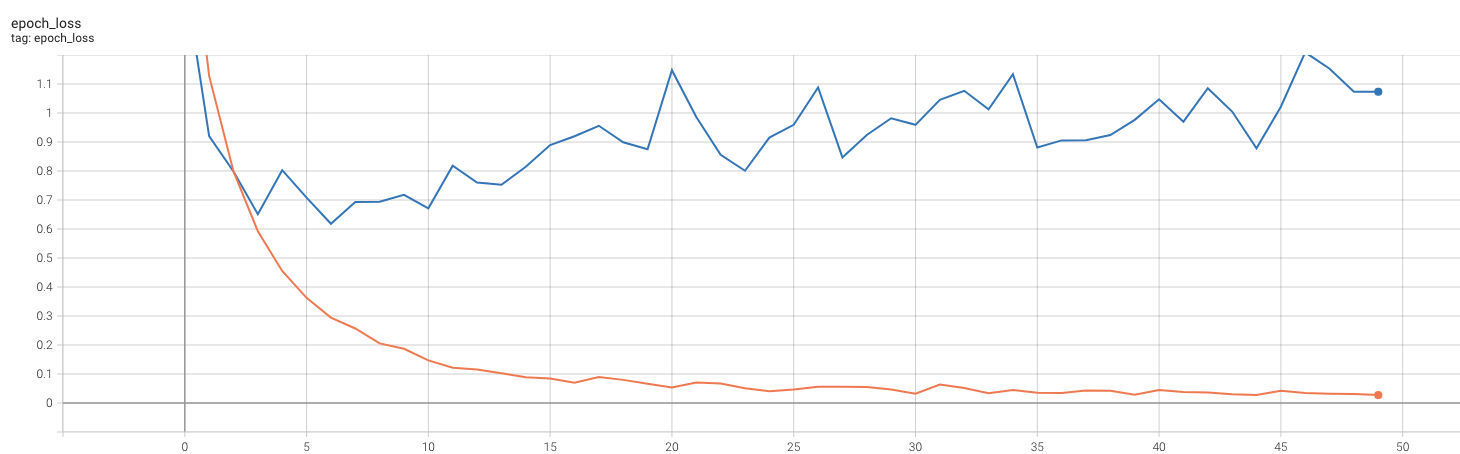
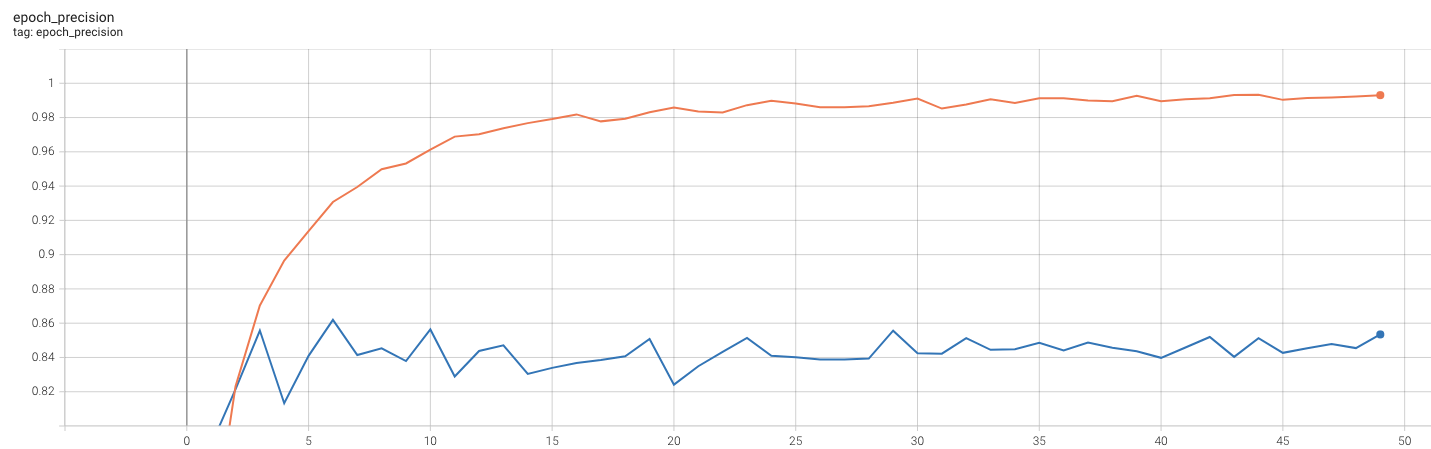
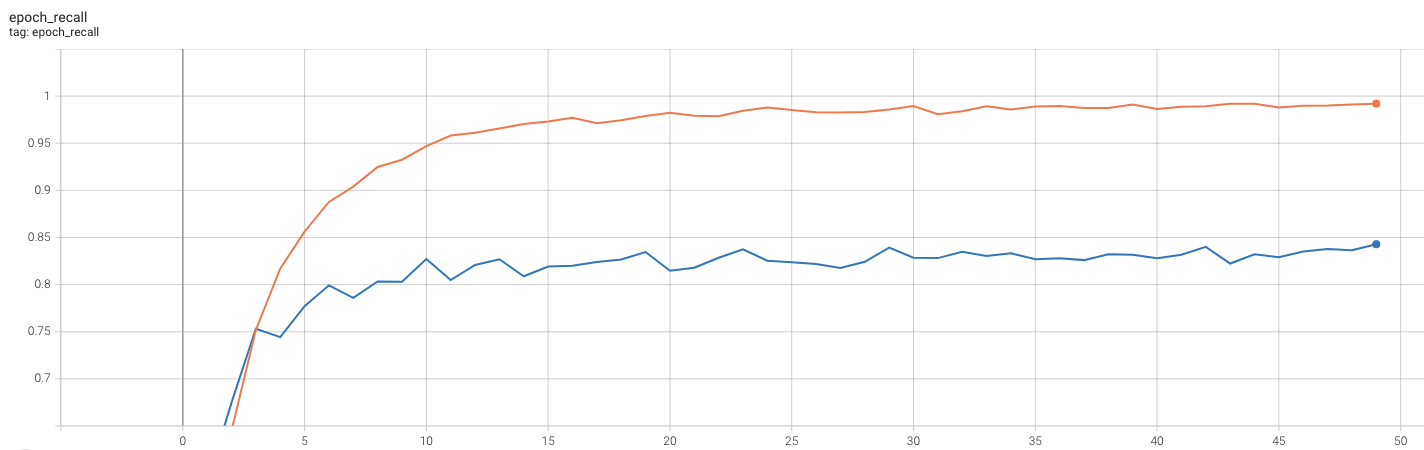

Графики изменения loss, precision и recall в ходе обучения из TensorBoard (Оранжевый - train, Синий - valid)


In [20]:
model.save('hw_1.h5')
model.save('hw_1.keras')

In [10]:
model = keras.models.load_model('hw_1.h5')

In [12]:
eval_hist = model.evaluate(dataset_test, callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs_eval'))

8/8 [==============================] - 1s 110ms/step - loss: 1.1909 - f1_score: 0.8405 - precision: 0.8483 - recall: 0.8385


In [13]:
preds = model.predict(X_valid)

63/63 [==============================] - 1s 19ms/step


In [18]:
preds = np.argmax(preds, axis=1)
y_valid_idx = np.argmax(y_valid, axis=1)

In [21]:
print(classification_report(y_valid_idx, preds))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       189
           1       0.91      0.92      0.91       192
           2       0.80      0.77      0.79       195
           3       0.65      0.74      0.69       193
           4       0.77      0.85      0.81       199
           5       0.79      0.76      0.78       213
           6       0.84      0.88      0.86       197
           7       0.91      0.86      0.89       198
           8       0.94      0.91      0.92       201
           9       0.95      0.90      0.92       223

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



Text(0.5, 1.0, 'Predicted class:6  Real class:6')

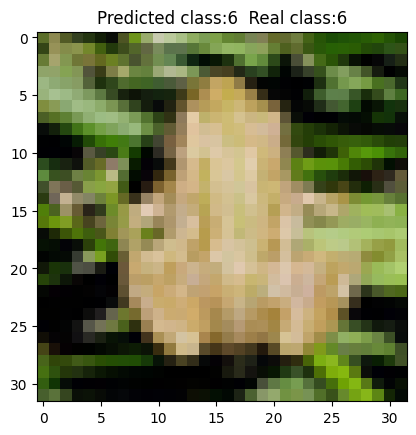

In [25]:
i = 0
plt.imshow(X_valid[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_valid_idx[i]))

Text(0.5, 1.0, 'Predicted class:6  Real class:6')

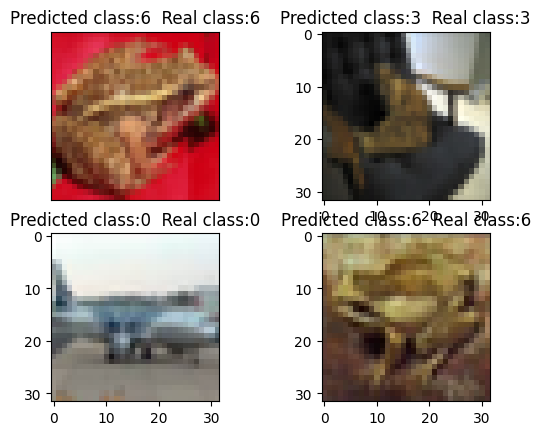

In [29]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(X_valid[1])
axs[0, 0].set_title('Predicted class:'+str(preds[1])+'  Real class:'+str(y_valid_idx[1]))
axs[0, 0].set(xticks=[], yticks=[])
axs[0, 1].imshow(X_valid[3])
axs[0, 1].set_title('Predicted class:'+str(preds[3])+'  Real class:'+str(y_valid_idx[3]))
axs[1, 0].imshow(X_valid[10])
axs[1, 0].set_title('Predicted class:'+str(preds[10])+'  Real class:'+str(y_valid_idx[10]))
axs[1, 1].imshow(X_valid[25])
axs[1, 1].set_title('Predicted class:'+str(preds[25])+'  Real class:'+str(y_valid_idx[25]))

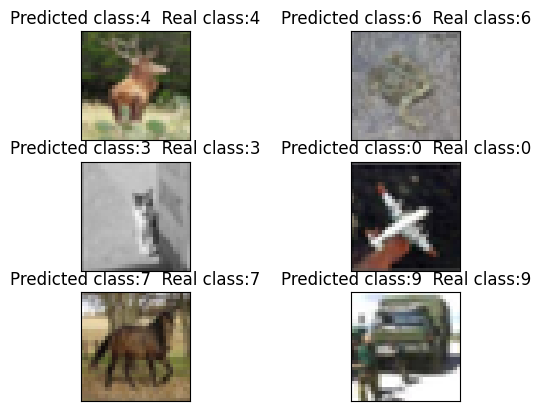

In [37]:
h, w = (2, 3)
fig, axs = plt.subplots(w, h)
for i in range(w):
    for j in range(h):
        num = np.random.randint(2000)
        axs[i, j].imshow(X_valid[num])
        axs[i, j].set_title('Predicted class:'+str(preds[num])+'  Real class:'+str(y_valid_idx[num]))
        axs[i, j].set(xticks=[], yticks=[])